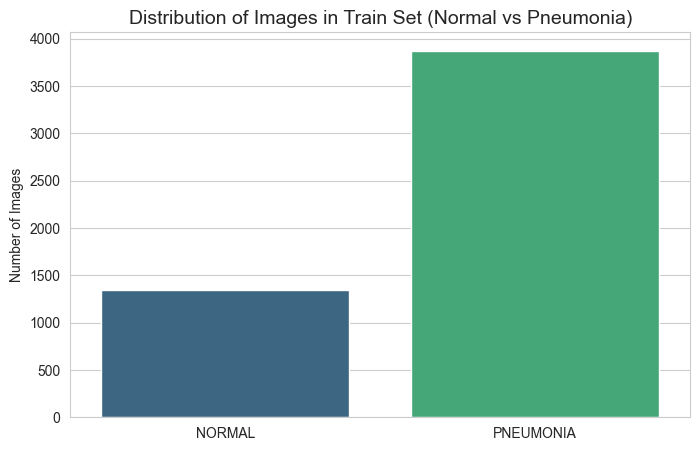

In [1]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


DATA_DIR = '../data/chest_xray' 
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')
VAL_DIR = os.path.join(DATA_DIR, 'val')


categories = ['NORMAL', 'PNEUMONIA']
data_counts = []

for category in categories:
    path = os.path.join(TRAIN_DIR, category)
    count = len(os.listdir(path))
    data_counts.append(count)






plt.figure(figsize=(8, 5))

sns.barplot(x=categories, y=data_counts, hue=categories, legend=False, palette='viridis')

plt.title('Distribution of Images in Train Set (Normal vs Pneumonia)', fontsize=14)
plt.ylabel('Number of Images')
plt.show()










<div dir="rtl">
همانطور که در نمودار مشخص است . تعداد تصاویر ذات الریه بسیار بیشتر از تصاویر نرمال است . به دلیل این عدم تعادل در فاز 
دوم اموزش مدل از تکنیک 
کلس ویتینگ
استفاده خواهیم کرد تا مدل دچار خطا نشود.
</div> 

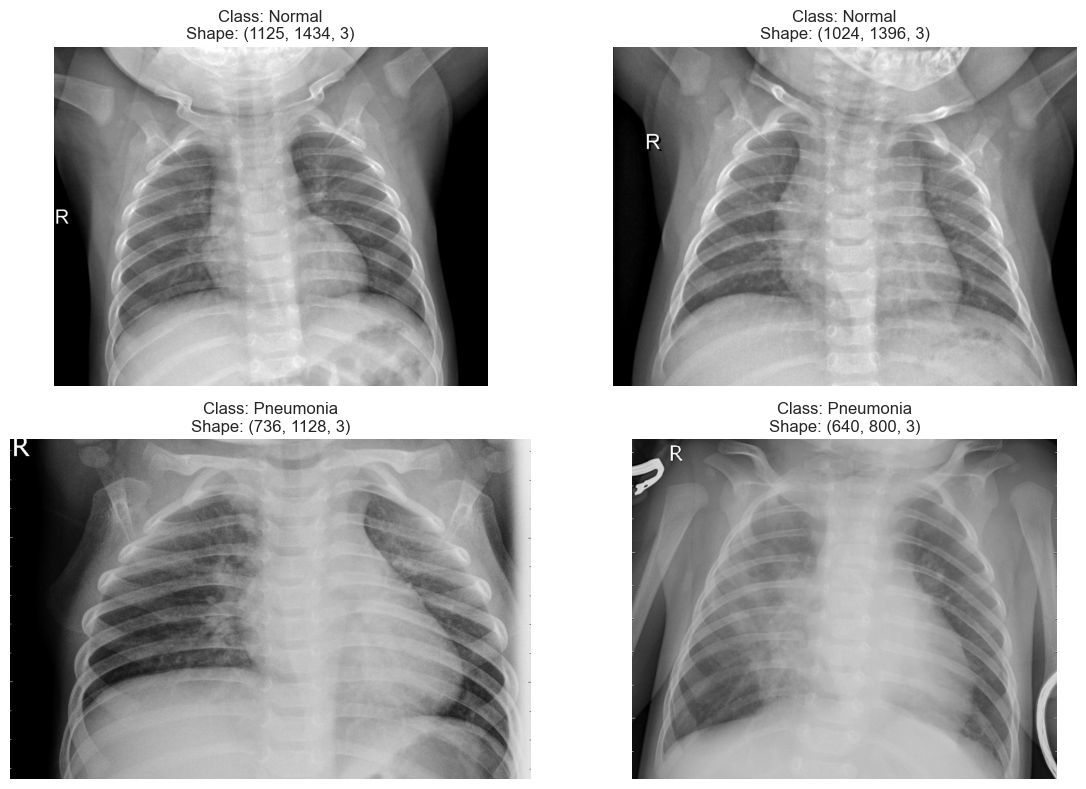

In [2]:

plt.figure(figsize=(12, 8))


normal_files = glob.glob(os.path.join(TRAIN_DIR, 'NORMAL', '*.jpeg'))
pneumonia_files = glob.glob(os.path.join(TRAIN_DIR, 'PNEUMONIA', '*.jpeg'))


select_normal = np.random.choice(normal_files, 2, replace=False)
select_pneumonia = np.random.choice(pneumonia_files, 2, replace=False)
all_selections = np.concatenate([select_normal, select_pneumonia])
labels = ['Normal', 'Normal', 'Pneumonia', 'Pneumonia']

for i, img_path in enumerate(all_selections):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(f"Class: {labels[i]}\nShape: {img.shape}")
    plt.axis('off')

plt.tight_layout()
plt.show()

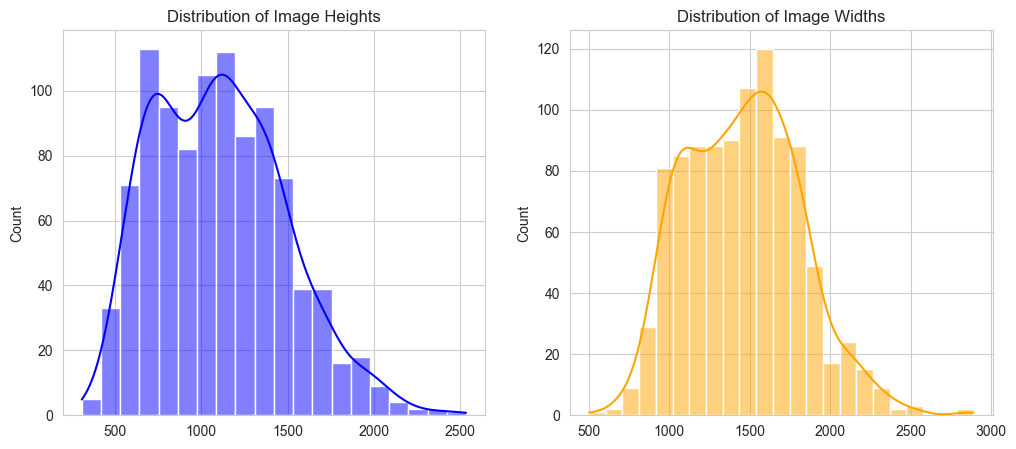

In [3]:


heights = []
widths = []


for img_path in normal_files[:500] + pneumonia_files[:500]:
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(heights, kde=True, color='blue')
plt.title('Distribution of Image Heights')

plt.subplot(1, 2, 2)
sns.histplot(widths, kde=True, color='orange')
plt.title('Distribution of Image Widths')

plt.show()

<div dir="rtl">
نمودارها نشان می‌دهند که ارتفاع و پهنای عکس‌ها یکسان نیست و پراکندگی زیادی دارد. بنابراین، قبل از دادن تصاویر به مدل هوش مصنوعی، تمام آن‌ها باید به یک سایز استاندارد 
تغییر اندازه داده شوند .همچنین شدت روشنایی پیکسل‌ها نیاز به نرمال‌سازی دارد.
<div dir="rtl">

start processing...
تعداد عکس‌های انتخاب شده برای تحلیل: 20
در حال خواندن عکس شماره 1...
در حال خواندن عکس شماره 6...
در حال خواندن عکس شماره 11...
در حال خواندن عکس شماره 16...
در حال رسم نمودار (چند لحظه صبر کنید)...


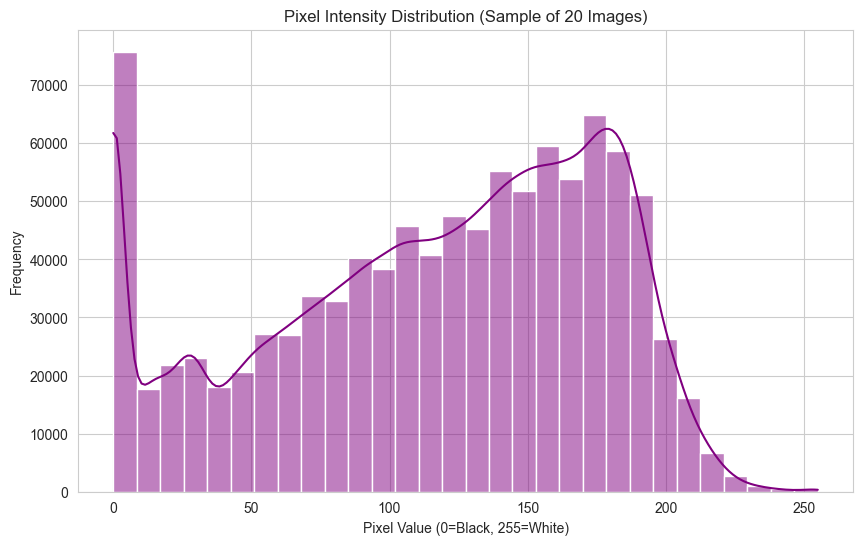

--------------------------------------------------
تحلیل: نمودار نشان می‌دهد پیکسل‌ها در تمام بازه ۰ تا ۲۵۵ پخش شده‌اند.
نتیجه: نیاز قطعی به Normalization (تقسیم بر ۲۵۵) وجود دارد.
--------------------------------------------------


In [4]:

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

print("start processing...")


if 'normal_files' not in locals():
    DATA_DIR = '../data'
    TRAIN_DIR = os.path.join(DATA_DIR, 'train')
    normal_files = glob.glob(os.path.join(TRAIN_DIR, 'NORMAL', '*.jpeg'))
    pneumonia_files = glob.glob(os.path.join(TRAIN_DIR, 'PNEUMONIA', '*.jpeg'))
    if not normal_files: normal_files = glob.glob(os.path.join(TRAIN_DIR, 'NORMAL', '*.jpg'))
    if not pneumonia_files: pneumonia_files = glob.glob(os.path.join(TRAIN_DIR, 'PNEUMONIA', '*.jpg'))

pixel_intensities = []


sample_limit = 10 
all_files_sample = normal_files[:sample_limit] + pneumonia_files[:sample_limit] 

print(f"تعداد عکس‌های انتخاب شده برای تحلیل: {len(all_files_sample)}")

for i, img_path in enumerate(all_files_sample):

    if i % 5 == 0:
        print(f"در حال خواندن عکس شماره {i+1}...")
        
    img = cv2.imread(img_path, 0) 
    if img is not None:
      
        img_small = cv2.resize(img, (224, 224))
        pixel_intensities.extend(img_small.flatten())

print("در حال رسم نمودار (چند لحظه صبر کنید)...")

plt.figure(figsize=(10, 6))

sns.histplot(pixel_intensities, bins=30, kde=True, color='purple')
plt.title(f'Pixel Intensity Distribution (Sample of {len(all_files_sample)} Images)')
plt.xlabel('Pixel Value (0=Black, 255=White)')
plt.ylabel('Frequency')
plt.show()


print("-" * 50)
print("تحلیل: نمودار نشان می‌دهد پیکسل‌ها در تمام بازه ۰ تا ۲۵۵ پخش شده‌اند.")
print("نتیجه: نیاز قطعی به Normalization (تقسیم بر ۲۵۵) وجود دارد.")
print("-" * 50)

در حال خواندن فایل نمونه داخلی...
Modality: CT
Patient ID: 1CT1
Image Size: 128 x 128


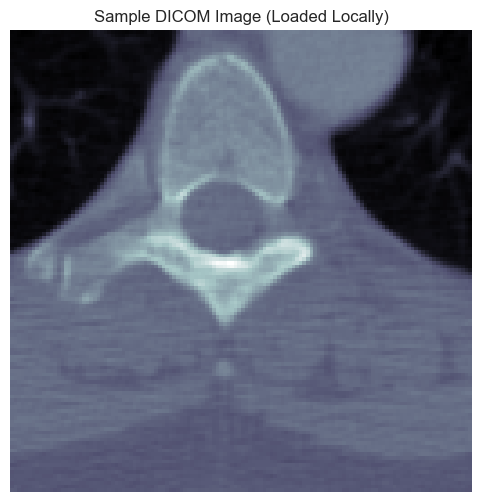

In [5]:


import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt

print("در حال خواندن فایل نمونه داخلی...")


filename = get_testdata_file("CT_small.dcm")
ds = pydicom.dcmread(filename)


print(f"Modality: {ds.Modality}")
print(f"Patient ID: {ds.PatientID}")
print(f"Image Size: {ds.Rows} x {ds.Columns}")


plt.figure(figsize=(6, 6))
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.title("Sample DICOM Image (Loaded Locally)")
plt.axis('off')
plt.show()

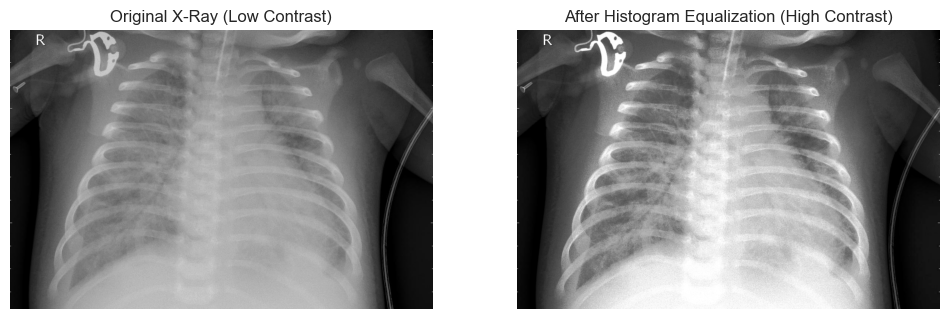

In [6]:

import cv2
import matplotlib.pyplot as plt


if 'pneumonia_files' in locals() and len(pneumonia_files) > 0:
    sample_path = pneumonia_files[0]
    

    img_original = cv2.imread(sample_path, 0)
    
   
    img_equalized = cv2.equalizeHist(img_original)
    
   
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_original, cmap='gray')
    plt.title("Original X-Ray (Low Contrast)")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img_equalized, cmap='gray')
    plt.title("After Histogram Equalization (High Contrast)")
    plt.axis('off')
    
    plt.show()
else:
    print("Please run previous cells to load file lists first.")

<div dir="rtl" style="text-align: right;">

<h3>تکنیک پیش‌پردازش تخصصی: Histogram Equalization</h3>

<p>
در تصاویر پزشکی ایکس ری، گاهی اوقات کنتراست تصویر پایین است و تشخیص دقیق عفونت دشوار می‌شود. به همین دلیل ما از تکنیک <b>هیستوگرام ایکولایزیشن (Histogram Equalization)</b> استفاده می‌کنیم.
</p>

</div>